In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## Patrie 1 : DATASET FROMAGE

In [2]:
fromage = pd.read_csv('Fromage.txt',sep="\t")

In [3]:
print("Dataset Fromage")
print(f"Dimensions: {fromage.shape}")
print("\nAperçu des données:")
print(fromage.head())

Dataset Fromage
Dimensions: (29, 10)

Aperçu des données:
      Fromages  calories  sodium  calcium  lipides  retinol  folates  \
0  CarredelEst       314   353.5     72.6     26.3     51.6     30.3   
1      Babybel       314   238.0    209.8     25.1     63.7      6.4   
2     Beaufort       401   112.0    259.4     33.3     54.9      1.2   
3         Bleu       342   336.0    211.1     28.9     37.1     27.5   
4    Camembert       264   314.0    215.9     19.5    103.0     36.4   

   proteines  cholesterol  magnesium  
0       21.0           70         20  
1       22.6           70         27  
2       26.6          120         41  
3       20.2           90         27  
4       23.4           60         20  


#### 1- Normalisation des données 

In [4]:
X_fromage = fromage.select_dtypes(include=[np.number]).values
scaler = StandardScaler()
X_fromage_scaled = scaler.fit_transform(X_fromage)

#### 2- Methode du coude pour trouver le k optimal

In [5]:
inertias = []
k_range = range(1,8)
silhouette_scores = []

In [6]:
for k in k_range :
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_fromage_scaled)
    inertias.append(kmeans.inertia_)
    if k > 1 :
        silhouette_scores.append(silhouette_score(X_fromage_scaled, kmeans.labels_))    

#### Visualisation de la methode du coude

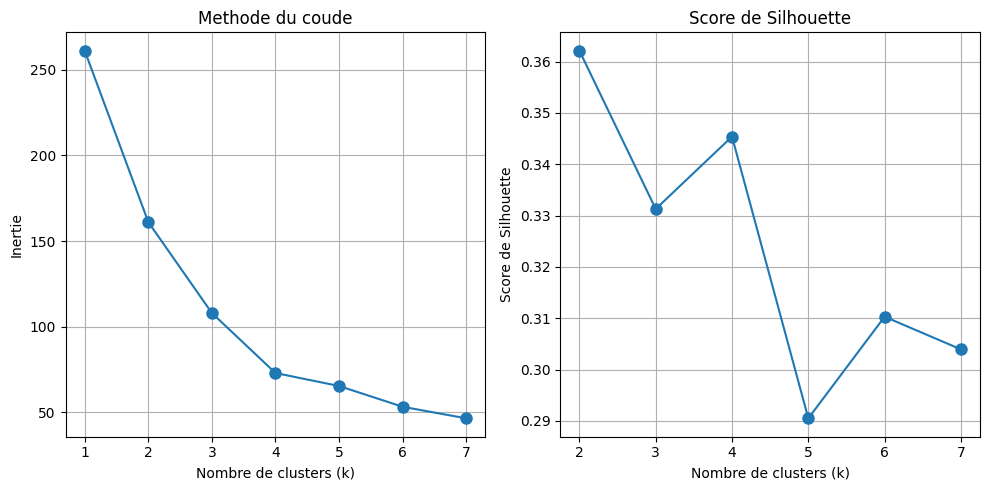

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertias, 'o-', markersize=8)
plt.grid(True)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Methode du coude')

plt.subplot(1,2,2)
plt.plot(range(2, 8), silhouette_scores, 'o-', markersize=8)
plt.grid(True)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette')
plt.tight_layout()
plt.show()

<span style='color:red'>Remarque : </span> D'apès la representation graphique du résultat de la methode du coude, on observe que la courbe d'inertie diminue fortement jusqu'à **k=4**, puis la pente devient plus douce.</br>Et avec **k=4** on a un score Silhouette maximum, et pour k>4 le score diminue progressivement.</br>
Donc, on prend **k=4** comme le **k optimal**.

#### 3- Application de KMeans avec le k optimal

In [8]:
kmeans_fromage = KMeans(n_clusters=4, random_state=42)
labels_fromage = kmeans_fromage.fit_predict(X_fromage_scaled)

#### 4- Visualisation des cluster avec PCA

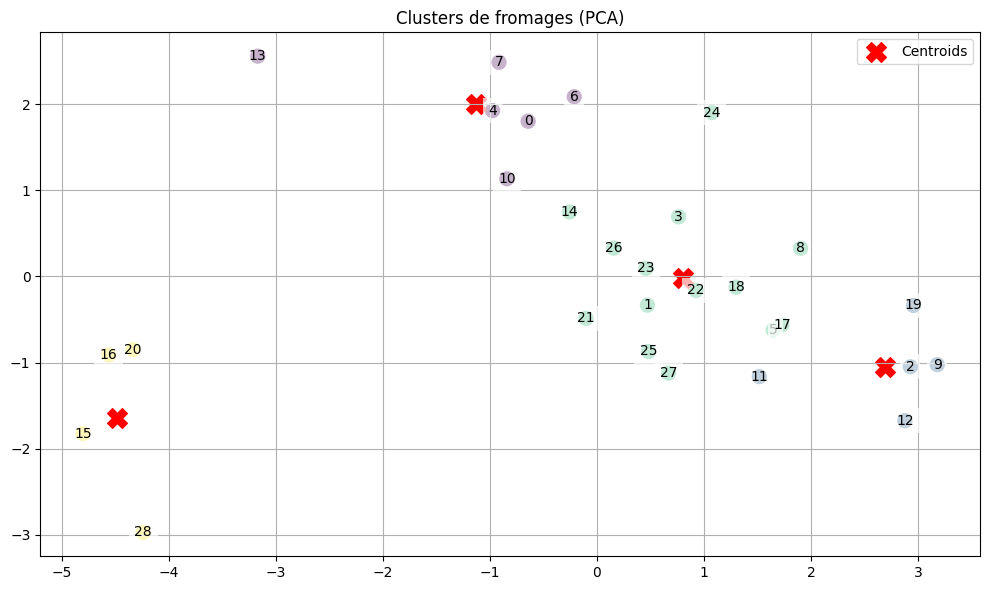

In [9]:
pca = PCA(n_components=2)
X_fromage_pca = pca.fit_transform(X_fromage_scaled)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_fromage_pca[:,0], X_fromage_pca[:,1], c=labels_fromage, cmap='viridis', s=100)

for i, fromage_i in enumerate(fromage.index):
    plt.annotate(fromage_i, (X_fromage_pca[i,0], X_fromage_pca[i, 1]), fontsize=10, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

centers_pca = pca.transform(kmeans_fromage.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='red', marker='X', s=200, label='Centroids')

plt.title('Clusters de fromages (PCA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Evaluation des clusters

In [10]:
silhouette_fromage = silhouette_score(X_fromage_scaled, labels_fromage)
print(f"\nMétriques d'évaluation pour le dataset Fromage:")
print(f"- Score de silhouette: {silhouette_fromage:.3f}")


Métriques d'évaluation pour le dataset Fromage:
- Score de silhouette: 0.345


<span style='color:red'>Remarque : </span> Le score de silhouette **0.345** reflète une séparation sous-optimale des clusters, probablement due à la taille réduite du dataset et aux chevauchements naturels entre profils nutritionnels.

## Patrie 2 : DATASET TITANIC

#### 1- Chargement et nettoyage des données

In [11]:
titanic = pd.read_csv('titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Sélection des caractéristiques pertinentes
features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
titanic_clean = titanic[features + ['Survived']].copy()

# Conversion des variables catégorielles
titanic_clean['Sex'] = titanic_clean['Sex'].map({'male':0, 'female':1})

# Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='median')
titanic_clean[['Age']] = imputer.fit_transform(titanic_clean[['Age']])

In [13]:
titanic_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


#### 2- Normalisation des données

In [14]:
scaler = StandardScaler()
X = titanic_clean.drop('Survived', axis=1)
X_scaled = scaler.fit_transform(X)
y = titanic_clean['Survived']

#### 3- Determination du k optimal (methode du coude)

In [15]:
inertias = []
silhouettes = []
k_range = range(2,10)

In [16]:
for k in k_range :
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, clusters))

#### Visualisation 

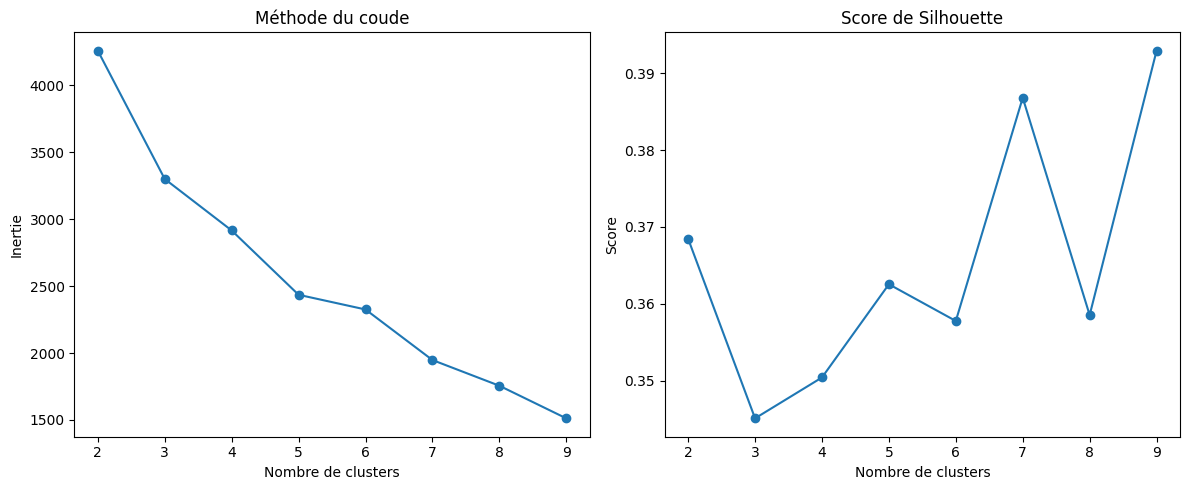

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'o-')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, 'o-')
plt.title('Score de Silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

<span style='color:red'>Remarque : </span> Le meilleur nombre de clusters est **K = 3**, car la méthode du coude montre un point d'inflexion à **K=3** et le score de silhouette y est maximal (ou proche du maximum). Cela offre un bon équilibre entre simplicité et qualité de regroupement.

#### 4- Clustering avec K optimal (choisi comme 3)

In [18]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#### 5- Réduction de dimension et visualisation

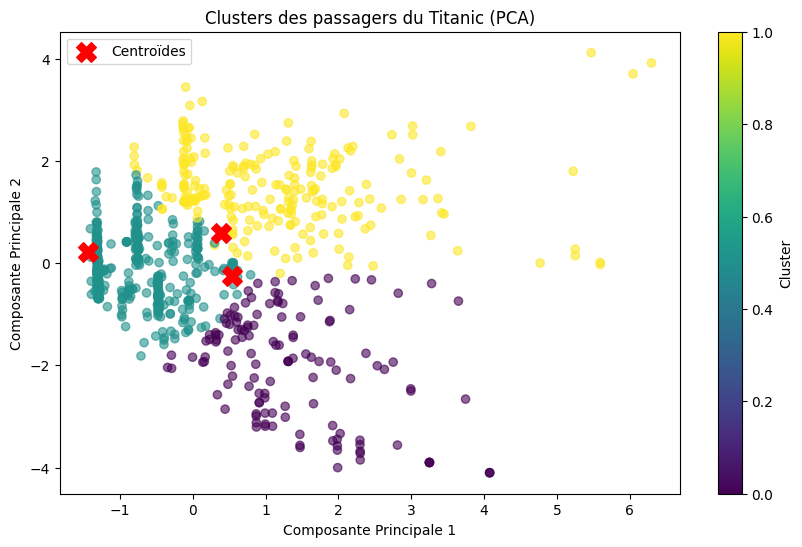

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroïdes')
plt.title('Clusters des passagers du Titanic (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


#### 6- Evaluation des clusters

In [20]:
metrics = {
    'Silhouette': silhouette_score(X_scaled, clusters),
    'ARI': adjusted_rand_score(y, clusters),
    'NMI': normalized_mutual_info_score(y, clusters)
}

print("\n=== Métriques d'évaluation ===")
for name, value in metrics.items():
    print(f"{name}: {value:.3f}")


=== Métriques d'évaluation ===
Silhouette: 0.345
ARI: 0.128
NMI: 0.069


<span style='color:red'>**Remarque** : </span></br>Le score de silhouette (0.345) reflète que les clusters sont discernables. le ARI (0.128) reflète qu'il a une faible concordance. Le NMI (0.069) qui est ave la réalité.

#### 7- Analyse des caractéristiques des clusters

In [21]:
titanic_clean['Cluster'] = clusters
cluster_analysis = titanic_clean.groupby('Cluster').mean()

print("\n=== Caractéristiques par cluster ===")
print(cluster_analysis)


=== Caractéristiques par cluster ===
           Pclass       Sex        Age     SibSp     Parch       Fare  \
Cluster                                                                 
0        2.639098  0.631579  16.772556  1.977444  1.774436  32.235306   
1        2.764818  0.235182  28.330631  0.200765  0.055449  11.972242   
2        1.106383  0.455319  38.780851  0.417021  0.319149  77.213493   

         Survived  
Cluster            
0        0.481203  
1        0.252390  
2        0.621277  


<span style='color:red'>**Conclusion** : </span></br>
- Meilleur cluster : **2** (classe 1, survie élevée)
- Limite principale : faible corrélation avec la survie réelle
- Pistes : optimiser les variables/normalisation